# LSTM과 GRU셀

## LSTM
LSTM은 Long Short-Term Memory의 약자입니다. 말 그대로 단기 기억을 오래 기억하기 위해 고안 되었습니다.

### 셀 상태
정보가 전혀 바뀌지 않고 그대로 흐르게만 하는 것은 매우 쉽게 할 수 있습니다.

LSTM은 cell state에 뭔가를 더하거나 없앨 수 있는 능력이 있는데, 이 능력은 gate라고 불리는 구조에 의해서 조심스럽게 제어됩니다.

셀 상태는 장기기억(위쪽 선), 은닉 상태는 단기기억(아래쪽 선)을 의미합니다.



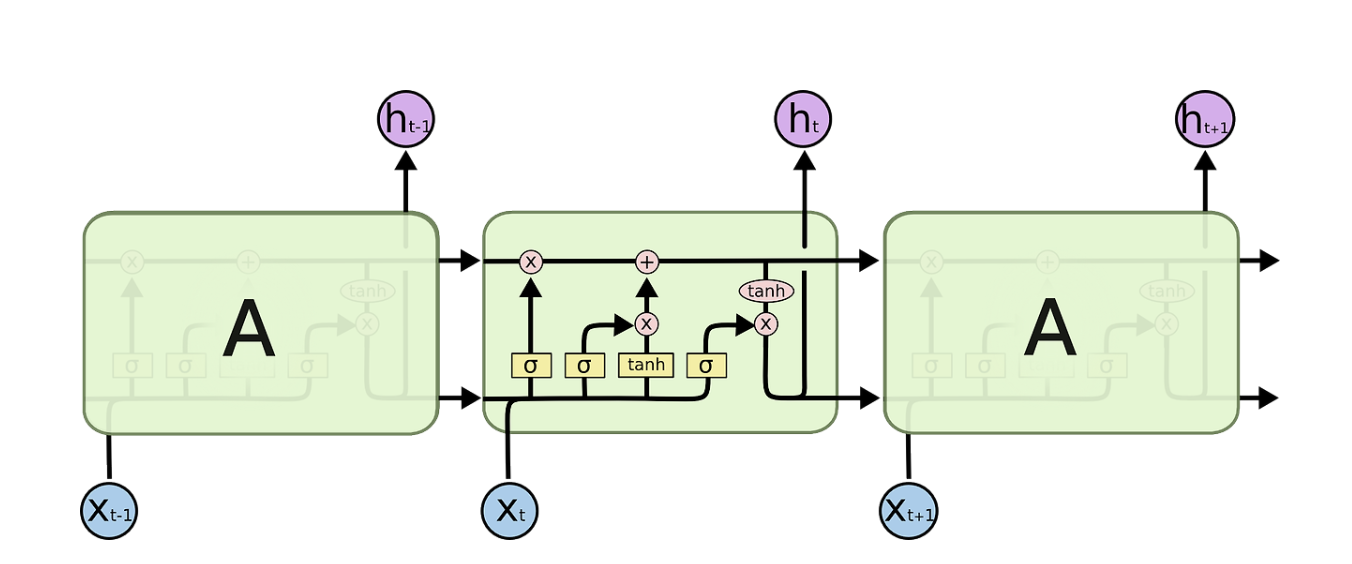

위 사진에서 왼쪽부터 차례대로 망각 게이트, 입력 게이트, 출력 게이트라고 합니다.


### 망각 게이트
망각 게이트는 과거 정보를 어느 정도 기억할지 결정하는 게이트입니다.

시그모이드의 출력이 0이면 과거 정보는 버리고, 1이면 과거 정보는 온전히 보존합니다.

### 입력 게이트
입력 게이트는 현재 정보를 기억하기 위해 만들어졌습니다.

과거 정보와 현재 데이터를 입력 받아 시그모이드와 하이퍼볼릭 탄젠트 함수를 기반으로 현재 정보에 대한 보존량을 결정합니다.

계산한 값이 1이면 입력 데이터가 들어올 수 있도록 허용하고, 0이면 차단합니다.

### 출력 게이트 
출력 게이트는 과거 정보와 현재 데이터를 사용하여 뉴런의 출력을 결정합니다.

이전 은닉 상태와 t번쨰 입력을 고려해서 다음 은닉 상태를 계산합니다.




In [1]:
#LSTM 신경망 훈련하기
from tensorflow import keras
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


In [2]:

from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6920 - accuracy: 0.5429 - val_loss: 0.6905 - val_accuracy: 0.5902
Epoch 2/100
 10/313 [..............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5750

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 20ms/step - loss: 0.6884 - accuracy: 0.6126 - val_loss: 0.6853 - val_accuracy: 0.6308
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6797 - accuracy: 0.6486 - val_loss: 0.6717 - val_accuracy: 0.6534
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6526 - accuracy: 0.6727 - val_loss: 0.6231 - val_accuracy: 0.7172
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5917 - accuracy: 0.7361 - val_loss: 0.5749 - val_accuracy: 0.7324
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5579 - accuracy: 0.7467 - val_loss: 0.5503 - val_accuracy: 0.7410
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5309 - accuracy: 0.7594 - val_loss: 0.5261 - val_accuracy: 0.7546
Epoch 8/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5060 - accuracy: 0.7696 - val_loss: 0.5046 - val_accuracy: 0.7686
Epoc

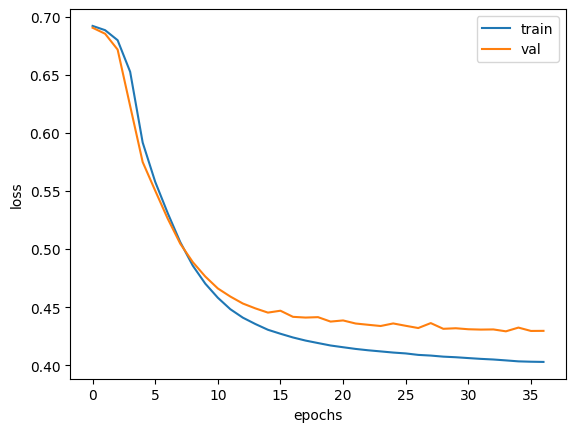

In [3]:
rmsprop = keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [5]:
#드롭아웃 적용하기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop=keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6924 - accuracy: 0.5334 - val_loss: 0.6918 - val_accuracy: 0.5370
Epoch 2/100
 10/313 [..............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5844

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 20ms/step - loss: 0.6899 - accuracy: 0.5773 - val_loss: 0.6882 - val_accuracy: 0.5984
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6833 - accuracy: 0.6273 - val_loss: 0.6786 - val_accuracy: 0.6072
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6552 - accuracy: 0.6359 - val_loss: 0.6275 - val_accuracy: 0.6626
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6028 - accuracy: 0.7219 - val_loss: 0.5949 - val_accuracy: 0.7394
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5819 - accuracy: 0.7437 - val_loss: 0.5765 - val_accuracy: 0.7500
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5652 - accuracy: 0.7530 - val_loss: 0.5602 - val_accuracy: 0.7566
Epoch 8/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5485 - accuracy: 0.7602 - val_loss: 0.5467 - val_accuracy: 0.7618
Epoc

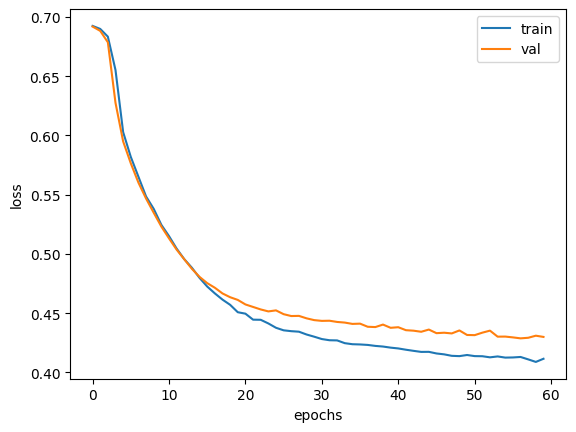

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6928 - accuracy: 0.5329 - val_loss: 0.6923 - val_accuracy: 0.5696
Epoch 2/100
  3/313 [..............................] - ETA: 12s - loss: 0.6922 - accuracy: 0.5885

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 12s 38ms/step - loss: 0.6905 - accuracy: 0.5907 - val_loss: 0.6872 - val_accuracy: 0.6500
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6732 - accuracy: 0.6564 - val_loss: 0.6425 - val_accuracy: 0.6866
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5935 - accuracy: 0.7077 - val_loss: 0.5582 - val_accuracy: 0.7298
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5443 - accuracy: 0.7407 - val_loss: 0.5256 - val_accuracy: 0.7536
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5210 - accuracy: 0.7539 - val_loss: 0.5064 - val_accuracy: 0.7624
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5038 - accuracy: 0.7646 - val_loss: 0.4934 - val_accuracy: 0.7696
Epoch 8/100
313/313 [==============================] - 12s 39ms/step - loss: 0.4914 - accuracy: 0.7706 - val_loss: 0.4831 - val_accuracy: 0.77

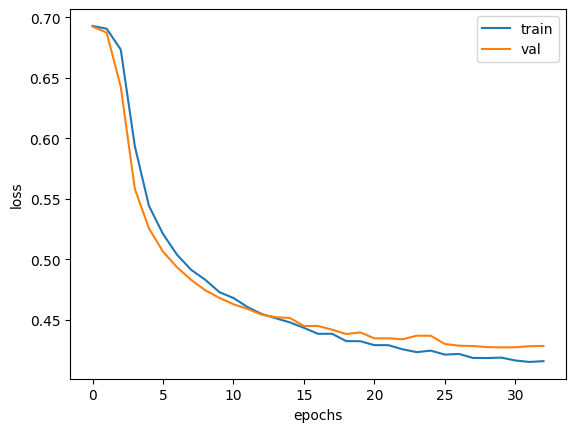

In [11]:
#두개의 층 연결하기
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

rmsprop=keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU
GRU는 LSTM에서 사용하는 망각 게이트와 입력 게이트를 하나로 합친 것이며, 별도의 업데이트 게이트로 구성됩니다.

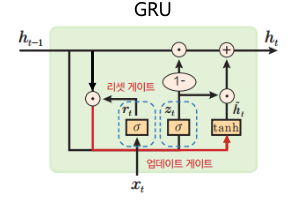

셀 상태를 없애고 은닉 상태가 장기 기억와 단기 기억을 모두 기억하도록 합니다.

### 망각 게이트
망각 게이트는 과거 정보를 적당히 초기화(reset)시키려는 목적으로 시그모이드 함수를 출력으로 이용하여 0~1사이의 값을 이전 은긱층에 곱합니다.

### 업데이트 게이트
업데이트 게이트는 과거와 현재 정보의 최신화 비율을 결정하는 역할을 합니다.

### 후보군
후보군(candidate)은 현시점의 정보에 대한 새로운 기억을 계산합니다.

과거 은닉층의 정보를 그대로 이용하지 않고 망각 게이트의 결과를 이용하여 후보군을 계산합니다.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_3 (GRU)                 (None, 8)                 624       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6926 - accuracy: 0.5311 - val_loss: 0.6921 - val_accuracy: 0.5530
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5335

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 22ms/step - loss: 0.6909 - accuracy: 0.5710 - val_loss: 0.6904 - val_accuracy: 0.5726
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6884 - accuracy: 0.5875 - val_loss: 0.6874 - val_accuracy: 0.5908
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6843 - accuracy: 0.6094 - val_loss: 0.6827 - val_accuracy: 0.6006
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6781 - accuracy: 0.6179 - val_loss: 0.6759 - val_accuracy: 0.6082
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6685 - accuracy: 0.6309 - val_loss: 0.6652 - val_accuracy: 0.6216
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6545 - accuracy: 0.6428 - val_loss: 0.6494 - val_accuracy: 0.6340
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6330 - accuracy: 0.6617 - val_loss: 0.6252 - val_accuracy: 0.6616
Epoc

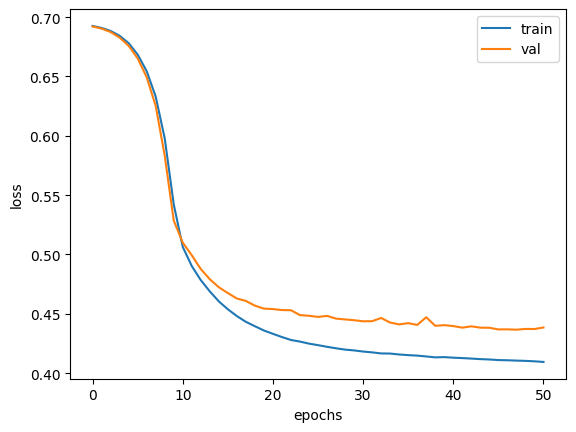

In [13]:
#GRU구조
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

rmsprop=keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
